# Here we care about classifying MBD>=10

Evaluation metrics used in machine learning and statistical analysis to assess the performance of classification models. Here's a brief overview of each of these metrics:

**Accuracy:** The proportion of correctly predicted instances out of the total number of instances in the dataset. It measures how well the model predicts the correct class label.

**Precision:** The proportion of true positive predictions (i.e., correctly predicted positive instances) out of all positive predictions (i.e., true positives and false positives). It measures how well the model avoids false positives.

**Recall:** The proportion of true positive predictions out of all actual positive instances (i.e., true positives and false negatives). It measures how well the model identifies all positive instances.

**F1-score:** The harmonic mean of precision and recall, which provides a balanced measure of the two metrics. It gives a more informative evaluation of the model's performance than accuracy when dealing with imbalanced datasets.

**ROC AUC** (Receiver Operating Characteristic Area Under the Curve): A graphical plot that illustrates the tradeoff between true positive rate and false positive rate for different classification thresholds. The ROC AUC score is the area under this curve and measures how well the model distinguishes between positive and negative instances, regardless of the classification threshold.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set pandas to display all columns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('new_222_data_train_decorr_imputed_transformed.csv')
df_test = pd.read_csv('new_222_data_test_decorr_imputed_transformed.csv')
# top 5% largest microbusiness_density
df['microbusiness_density'].quantile(0.95)

10.828764371999993

In [3]:
df['MBDgeq10'] = (df['microbusiness_density'] >= 10).astype(int)
df_test['MBDgeq10'] = (df_test['microbusiness_density'] >= 10).astype(int)
df.sample(5)

,Average Workers_Compensation_Costs_(per $100 of payroll),Debt_Service_as_a_Share_of_Tax_Revenue,Estate_Inheritance_Tax_Levied_Flag,GPT_OH_Government_Support,GPT_OH_Large_Customer_Base,GPT_OH_Limited_Financing,GPT_OH_Limited_Tech_n_Infra,GPT_OH_Low_Cost_of_Living,GPT_OH_Low_Pop_Bad_Weather,GPT_OH_Natural_Resources,GPT_OH_Supportive_Community,GPT_OH_Tough_Labor_Market,GPT_OH_Unfavorable_Location,GPT_OH_Various_Downsides,GPT_PCA_dim0,GPT_PCA_dim1,GPT_PCA_dim2,GPT_PCA_dim3,GPT_PCA_dim4,GPT_PCA_dim5,GPT_PCA_dim6,GPT_PCA_dim7,GPT_PCA_dim8,GPT_PCA_dim9,Prev_Yr_Agri_Pct_GDP_log,Prev_Yr_EduS_Pct_GDP_log,Prev_Yr_EntS_Pct_GDP_log,Prev_Yr_FinS_Pct_GDP_log,Prev_Yr_GoTr_Pct_GDP_log,Prev_Yr_Gvmt_Pct_GDP_log,Prev_Yr_Info_Pct_GDP_log,Prev_Yr_Manu_Pct_GDP_log,Prev_Yr_Mine_Pct_GDP_log,Prev_Yr_Retl_Pct_GDP_log,"Property_Tax_Burden_(per $1,000 of personal income)","Public_Employees_Per_10,000_of_Population_(full-time equivalent)",Recently_Legislated_Tax_Changes,"Remaining_Tax_Burden(per $1,000 of personal income)","Sales_Tax_Burden(per $1,000 of personal income)","State_Liability_System_Survey_(tort litigation treatment, judicial impartiality, etc.)",State_Minimum_Wage_(federal floor is $7.25),Tax_Expenditure_Limits,Top_Marginal_Personal_Income_Tax_Rate,coastline_flag,gpt_ae_pca_0,gpt_ae_pca_1,gpt_ae_pca_2,health_social_pca_0,health_social_pca_1,health_social_pca_2,health_social_pca_3,health_social_pca_4,health_social_pca_5,pop_10yr_pct_chg,prev_year_access_to_exercise_opportunities,prev_year_adult_obesity,prev_year_air_pollution_particulate_matter,prev_year_alcohol_impaired_driving_deaths,prev_year_dentists_log,prev_year_diabetes_monitoring,prev_year_drinking_water_violations,prev_year_driving_alone_to_work,prev_year_flu_vaccinations,prev_year_injury_deaths_log,prev_year_long_commute_driving_alone,prev_year_mental_health_providers_log,prev_year_preventable_hospital_stays_log,prev_year_primary_care_physicians_log,prev_year_severe_housing_problems_log,prev_year_social_associations,prev_year_uninsured,prev_year_violent_crime_log,prev_yr_rent_50_2_log,two_yrs_prior_pct_it_workers_log,population_2020_log,microbusiness_density,MBDgeq10
2092,1.95,0.06,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.547415,-0.528699,-0.415473,0.311772,0.100092,0.091081,-0.175617,-0.058667,-0.164085,-0.045023,0.198851,0.615186,0.231112,1.134623,1.587192,1.316408,0.076961,2.157559,4.454696,1.004302,19.64,572.6,-0.12,16.46,37.41,60.0,7.25,2.0,0.03,0.0,2.094365,-0.919028,0.299469,3.781220,1.803307,-1.041323,-0.919973,0.372293,1.120951,3.674541,0.44,0.43,9.4,0.16,9.527411,0.82,1.0,0.84,0.36,4.317488,0.45,6.018593,8.848222,8.610866,0.122218,11.3,0.10,6.107023,6.817831,0.182322,10.227417,1.791769,0
1263,1.61,0.05,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.638522,1.605748,0.094311,-0.660993,-0.353581,-0.328449,-0.007222,-0.103182,-0.387567,-0.146531,3.257327,0.000000,0.717840,2.871868,0.000000,2.328253,1.994700,2.861629,0.000000,1.566530,29.93,538.8,0.26,23.28,19.97,70.7,10.33,0.0,0.10,0.0,-0.082339,-0.461506,-0.357179,-2.198206,-0.597814,-0.822932,0.420603,0.301264,-0.268608,-6.063955,0.70,0.36,7.5,0.14,7.576097,0.86,0.0,0.81,0.52,4.330733,0.28,7.732369,8.732466,7.450661,0.095310,26.9,0.06,4.234107,6.599870,1.547563,9.517972,2.298560,0
2004,1.33,0.06,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.434310,0.281918,-0.108287,0.557580,0.544480,-0.576105,-0.012689,-0.096343,-0.214682,0.169492,1.809927,0.000000,0.506818,2.400619,2.315501,1.906575,0.542324,0.000000,1.232560,1.589235,14.37,583.5,0.55,20.87,26.04,65.6,7.25,0.0,0.04,0.0,-0.540678,0.177217,-0.106698,4.627232,1.831283,-1.402722,-0.579342,-0.726491,0.418687,-10.326401,0.29,0.47,8.9,0.62,7.650169,0.84,0.0,0.85,0.34,4.564348,0.46,9.440738,8.525161,7.852050,0.104360,21.8,0.13,4.859812,6.484635,0.587787,9.426983,1.572450,0
294,1.31,0.05,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.126324,-0.839663,-0.350237,0.640385,0.123792,-0.047706,-0.025160,0.445665,-0.297438,-0.342257,0.924259,2.740840,2.391511,3.2842

In [4]:
X = df.drop(['MBDgeq10', 'microbusiness_density'], axis=1)
y = df['MBDgeq10']
X_test = df_test.drop(['MBDgeq10', 'microbusiness_density'], axis=1)
y_test = df_test['MBDgeq10']

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [6]:
# accuracy of predicting the majority class which is 0
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, np.zeros(len(y_test)))))
print('Recall: {:.3f}'.format(recall_score(y_test, np.zeros(len(y_test)))))

Accuracy: 0.952
Recall: 0.000


# We care about **RECALL** --- the higher the better

In this scenario, the goal is to identify counties where the microbusiness density is above 10% so that targeted advertisements can be placed for economic profit. In such a case, it is crucial to identify all such counties, as missing out on a county with high microbusiness density could lead to lost opportunities for profit. Therefore, the most important metric in this scenario would be the Recall metric.

**Recall measures the proportion of actual positive instances that are correctly identified by the model.** In other words, Recall measures the model's ability to correctly identify all the counties where the microbusiness density is greater than 10%. By optimizing the Recall, we can ensure that we identify all the counties that meet the criteria, and we can then target them with the relevant advertisements to maximize our profits.

Accuracy: 0.955
Precision: 0.556
Recall: 0.333
F1: 0.417
ROC AUC: 0.944
          Predicted 0  Predicted 1
Actual 0          589            8
Actual 1           20           10


/Users/zzp/opt/anaconda3/envs/py38_trees/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


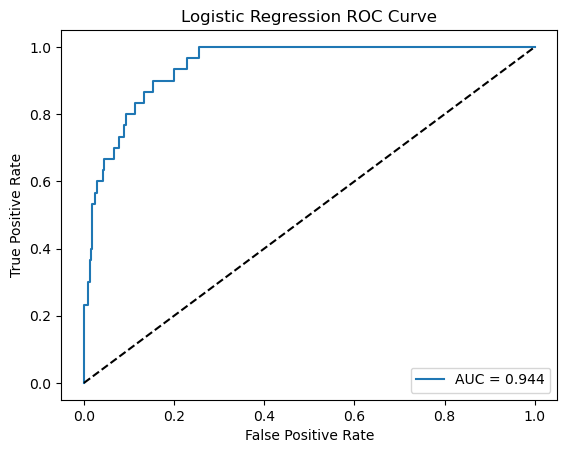

In [7]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

logistic_recall = recall_score(y_test, y_pred)
logistic_accuracy = accuracy_score(y_test, y_pred)
logistic_precision = precision_score(y_test, y_pred)
logistic_f1 = f1_score(y_test, y_pred)

print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.3f}'.format(f1_score(y_test, y_pred)))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test, y_pred_proba)))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(cm_df)

# ROC curve
logistic_fpr, logistic_tpr, thresholds = roc_curve(y_test, y_pred_proba)
logistic_auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(logistic_fpr, logistic_tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(['AUC = {:.3f}'.format(logistic_auc)])
plt.show()

Accuracy: 0.970
Precision: 0.867
Recall: 0.433
F1: 0.578
ROC AUC: 0.921
          Predicted 0  Predicted 1
Actual 0          595            2
Actual 1           17           13


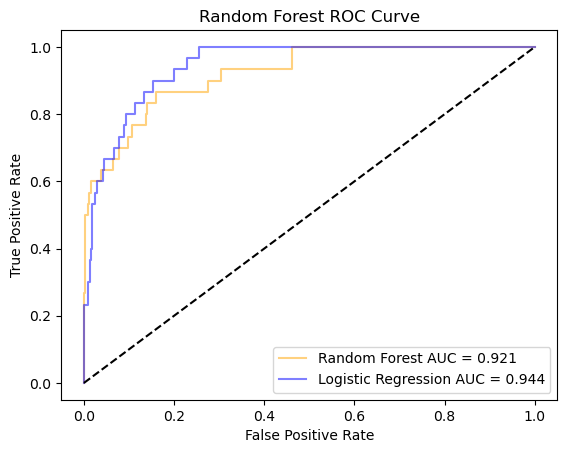

In [8]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier

best_params = {'max_depth': 10, 'n_estimators': 50}
rf = RandomForestClassifier(**best_params)
rf.fit(X, y)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

rf_recall = recall_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.3f}'.format(f1_score(y_test, y_pred)))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test, y_pred_proba)))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(cm_df)

# ROC curve
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_pred_proba)
rf_auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(rf_fpr, rf_tpr, color='orange', alpha=0.5)
plt.plot(logistic_fpr, logistic_tpr, color='blue', alpha=0.5)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(['Random Forest AUC = {:.3f}'.format(rf_auc), 'Logistic Regression AUC = {:.3f}'.format(logistic_auc)])
plt.show()

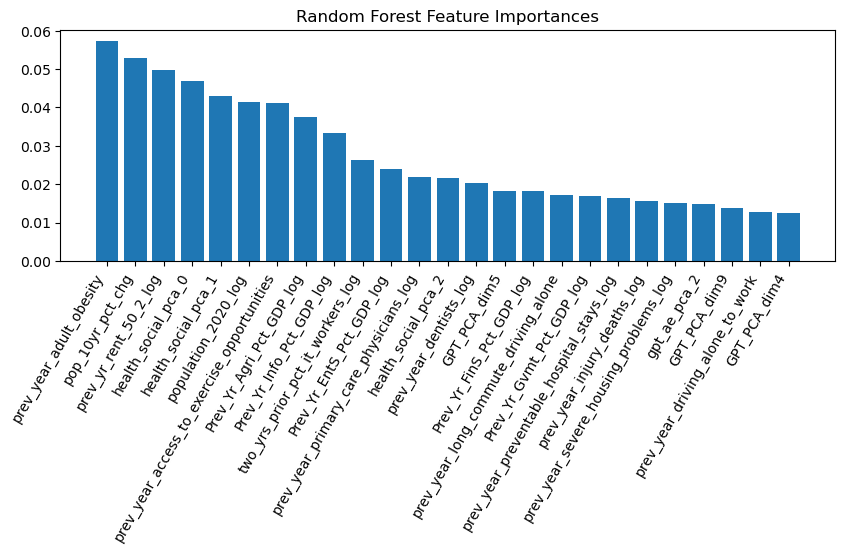

In [9]:
# feature importance plot top 25
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 3))
plt.title('Random Forest Feature Importances')
plt.bar(range(25), importances[indices[:25]])
plt.xticks(range(25), X.columns[indices[:25]], rotation=60, ha='right')
plt.show()

Accuracy: 0.965
Precision: 0.667
Recall: 0.533
F1: 0.593
ROC AUC: 0.883
          Predicted 0  Predicted 1
Actual 0          589            8
Actual 1           14           16


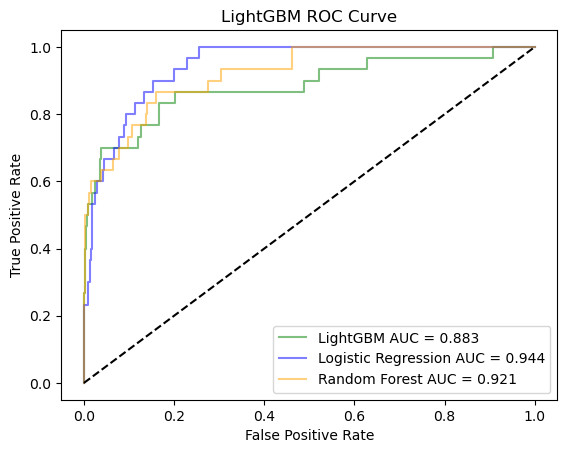

In [10]:
# lightgbm classifier
import lightgbm as lgb

# make column names compatible with lightgbm (keep only alphanumeric characters and underscores)
X.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X.columns]
X_test.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

lgbm_recall = recall_score(y_test, y_pred)
lgbm_accuracy = accuracy_score(y_test, y_pred)
lgbm_precision = precision_score(y_test, y_pred)
lgbm_f1 = f1_score(y_test, y_pred)

best_params = {'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 150, 'num_leaves': 30}
lgbm = lgb.LGBMClassifier(**best_params)
lgbm.fit(X, y)
y_pred = lgbm.predict(X_test)
y_pred_proba = lgbm.predict_proba(X_test)[:, 1]

print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.3f}'.format(f1_score(y_test, y_pred)))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test, y_pred_proba)))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(cm_df)

# ROC curve
lgbm_fpr, lgbm_tpr, thresholds = roc_curve(y_test, y_pred_proba)
lgbm_auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(lgbm_fpr, lgbm_tpr, color='green', alpha=0.5)
plt.plot(logistic_fpr, logistic_tpr, color='blue', alpha=0.5)
plt.plot(rf_fpr, rf_tpr, color='orange', alpha=0.5)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM ROC Curve')
plt.legend(['LightGBM AUC = {:.3f}'.format(lgbm_auc), 
            'Logistic Regression AUC = {:.3f}'.format(logistic_auc), 
            'Random Forest AUC = {:.3f}'.format(rf_auc)])
plt.show()

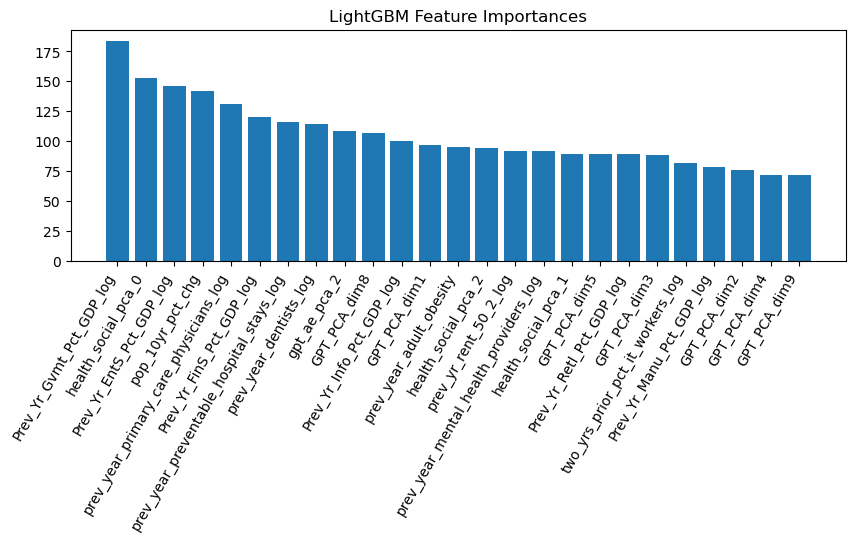

In [11]:
# feature importance plot top 25
importances = lgbm.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 3))
plt.title('LightGBM Feature Importances')
plt.bar(range(25), importances[indices[:25]])
plt.xticks(range(25), X.columns[indices[:25]], rotation=60, ha='right')
plt.show()

In [12]:
from sklearn.preprocessing import normalize
X_norm = normalize(X)
X_test_norm = normalize(X_test)

Accuracy: 0.967
Precision: 0.765
Recall: 0.433
F1: 0.553
ROC AUC: 0.929
          Predicted 0  Predicted 1
Actual 0          593            4
Actual 1           17           13


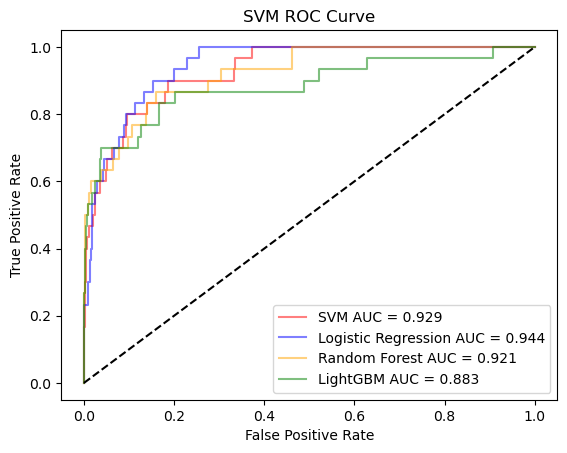

In [13]:
best_params = {'C': 46.41588833612782, 'gamma': 46.41588833612782}

# svm classifier
from sklearn.svm import SVC

svc = SVC(**best_params, probability=True)
svc.fit(X_norm, y)
y_pred = svc.predict(X_test_norm)
y_pred_proba = svc.predict_proba(X_test_norm)[:, 1]

svc_recall = recall_score(y_test, y_pred)
svc_accuracy = accuracy_score(y_test, y_pred)
svc_precision = precision_score(y_test, y_pred)
svc_f1 = f1_score(y_test, y_pred)

print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.3f}'.format(f1_score(y_test, y_pred)))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test, y_pred_proba)))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(cm_df)

# ROC curve
svc_fpr, svc_tpr, thresholds = roc_curve(y_test, y_pred_proba)
svc_auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(svc_fpr, svc_tpr, color='red', alpha=0.5)
plt.plot(logistic_fpr, logistic_tpr, color='blue', alpha=0.5)
plt.plot(rf_fpr, rf_tpr, color='orange', alpha=0.5)
plt.plot(lgbm_fpr, lgbm_tpr, color='green', alpha=0.5)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(['SVM AUC = {:.3f}'.format(svc_auc),
            'Logistic Regression AUC = {:.3f}'.format(logistic_auc),
            'Random Forest AUC = {:.3f}'.format(rf_auc),
            'LightGBM AUC = {:.3f}'.format(lgbm_auc)])
plt.show()

# SMOTE Resampling for class balancing
### this should make our models have better RECALL

In [14]:
# imbalanced data, use SMOTE to oversample minority class
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

(y_res == 1).sum() , (y_res == 0).sum()

(2360, 2360)

Accuracy: 0.884
Precision: 0.264
Recall: 0.800
F1: 0.397
ROC AUC: 0.945
          Predicted 0  Predicted 1
Actual 0          530           67
Actual 1            6           24


/Users/zzp/opt/anaconda3/envs/py38_trees/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


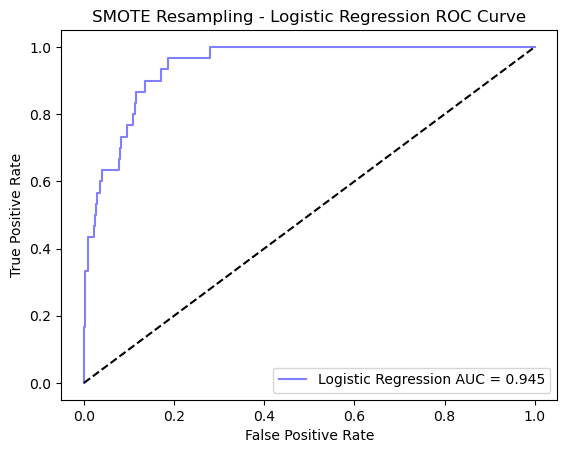

In [15]:
# logistic regression with SMOTE
logistic = LogisticRegression()
logistic.fit(X_res, y_res)
y_pred = logistic.predict(X_test)
y_pred_proba = logistic.predict_proba(X_test)[:, 1]

smote_logistic_recall = recall_score(y_test, y_pred)
smote_logistic_accuracy = accuracy_score(y_test, y_pred)
smote_logistic_precision = precision_score(y_test, y_pred)
smote_logistic_f1 = f1_score(y_test, y_pred)

print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.3f}'.format(f1_score(y_test, y_pred)))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test, y_pred_proba)))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(cm_df)

# ROC curve
logistic_fpr, logistic_tpr, thresholds = roc_curve(y_test, y_pred_proba)
logistic_auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(logistic_fpr, logistic_tpr, color='blue', alpha=0.5)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SMOTE Resampling - Logistic Regression ROC Curve')
plt.legend(['Logistic Regression AUC = {:.3f}'.format(logistic_auc)])
plt.show()

Accuracy: 0.962
Precision: 0.607
Recall: 0.567
F1: 0.586
ROC AUC: 0.936
          Predicted 0  Predicted 1
Actual 0          586           11
Actual 1           13           17


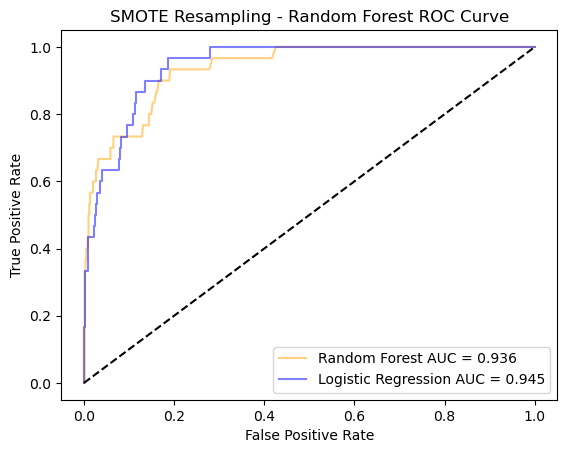

In [16]:
best_params = {'max_depth': 30, 'n_estimators': 500}

rf = RandomForestClassifier(**best_params)
rf.fit(X_res, y_res)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

smote_rf_recall = recall_score(y_test, y_pred)
smote_rf_accuracy = accuracy_score(y_test, y_pred)
smote_rf_precision = precision_score(y_test, y_pred)
smote_rf_f1 = f1_score(y_test, y_pred)

print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.3f}'.format(f1_score(y_test, y_pred)))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test, y_pred_proba)))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(cm_df)

# ROC curve
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_pred_proba)
rf_auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(rf_fpr, rf_tpr, color='orange', alpha=0.5)
plt.plot(logistic_fpr, logistic_tpr, color='blue', alpha=0.5)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SMOTE Resampling - Random Forest ROC Curve')
plt.legend(['Random Forest AUC = {:.3f}'.format(rf_auc),
            'Logistic Regression AUC = {:.3f}'.format(logistic_auc)])
plt.show()

Accuracy: 0.967
Precision: 0.680
Recall: 0.567
F1: 0.618
ROC AUC: 0.908
          Predicted 0  Predicted 1
Actual 0          589            8
Actual 1           13           17


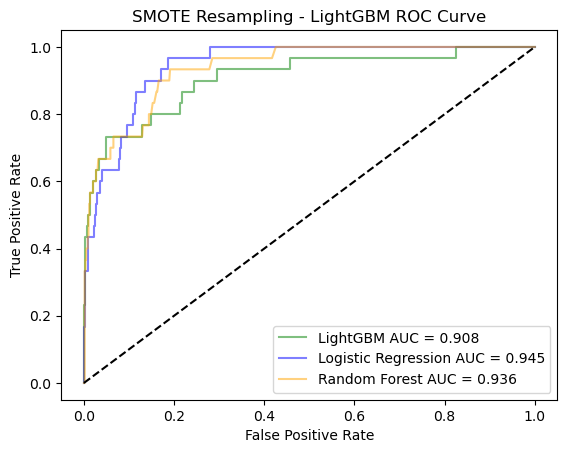

In [17]:
best_params = {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 190, 'num_leaves': 80}

lgbm = lgb.LGBMClassifier(**best_params)
lgbm.fit(X_res, y_res)
y_pred = lgbm.predict(X_test)
y_pred_proba = lgbm.predict_proba(X_test)[:, 1]

smote_lgbm_recall = recall_score(y_test, y_pred)
smote_lgbm_accuracy = accuracy_score(y_test, y_pred)
smote_lgbm_precision = precision_score(y_test, y_pred)
smote_lgbm_f1 = f1_score(y_test, y_pred)

print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.3f}'.format(f1_score(y_test, y_pred)))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test, y_pred_proba)))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(cm_df)

# ROC curve
lgbm_fpr, lgbm_tpr, thresholds = roc_curve(y_test, y_pred_proba)
lgbm_auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(lgbm_fpr, lgbm_tpr, color='green', alpha=0.5)
plt.plot(logistic_fpr, logistic_tpr, color='blue', alpha=0.5)
plt.plot(rf_fpr, rf_tpr, color='orange', alpha=0.5)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SMOTE Resampling - LightGBM ROC Curve')
plt.legend(['LightGBM AUC = {:.3f}'.format(lgbm_auc),
            'Logistic Regression AUC = {:.3f}'.format(logistic_auc),
            'Random Forest AUC = {:.3f}'.format(rf_auc)])
plt.show()

In [18]:
from sklearn.preprocessing import normalize
X_res_norm = normalize(X_res)
X_test_norm = normalize(X_test)

Accuracy: 0.943
Precision: 0.250
Recall: 0.100
F1: 0.143
ROC AUC: 0.825
          Predicted 0  Predicted 1
Actual 0          588            9
Actual 1           27            3


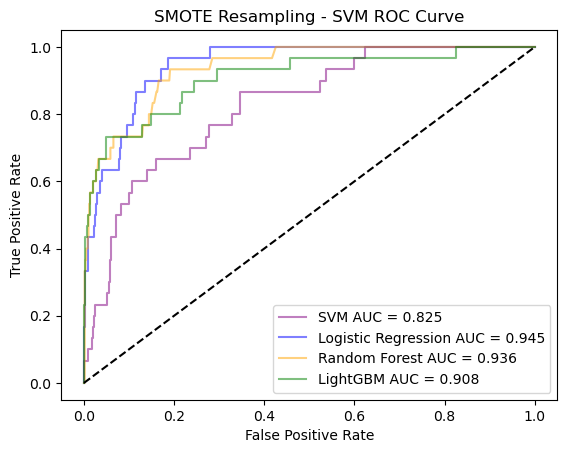

In [19]:
best_params = {'C': 46.41588833612782, 'gamma': 7742.636826811277}

svm = SVC(**best_params)
svm.fit(X_res_norm, y_res)
y_pred = svm.predict(X_test_norm)
y_pred_proba = svm.decision_function(X_test_norm)

smote_svm_recall = recall_score(y_test, y_pred)
smote_svm_accuracy = accuracy_score(y_test, y_pred)
smote_svm_precision = precision_score(y_test, y_pred)
smote_svm_f1 = f1_score(y_test, y_pred)

print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.3f}'.format(f1_score(y_test, y_pred)))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test, y_pred_proba)))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(cm_df)

# ROC curve
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, y_pred_proba)
svm_auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(svm_fpr, svm_tpr, color='purple', alpha=0.5)
plt.plot(logistic_fpr, logistic_tpr, color='blue', alpha=0.5)
plt.plot(rf_fpr, rf_tpr, color='orange', alpha=0.5)
plt.plot(lgbm_fpr, lgbm_tpr, color='green', alpha=0.5)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SMOTE Resampling - SVM ROC Curve')
plt.legend(['SVM AUC = {:.3f}'.format(svm_auc),
            'Logistic Regression AUC = {:.3f}'.format(logistic_auc),
            'Random Forest AUC = {:.3f}'.format(rf_auc),
            'LightGBM AUC = {:.3f}'.format(lgbm_auc)])
plt.show()

In [23]:
# put all scores into a dataframe
scores = pd.DataFrame({'Logistic Regression': [logistic_recall, logistic_accuracy, logistic_precision, logistic_f1],
                        'Random Forest': [rf_recall, rf_accuracy, rf_precision, rf_f1],
                        'LightGBM': [lgbm_recall, lgbm_accuracy, lgbm_precision, lgbm_f1],
                        'SVM': [svc_recall, svc_accuracy, svc_precision, svc_f1],
                        'SMOTE + Logistic Regression': [smote_logistic_recall, smote_logistic_accuracy, smote_logistic_precision, smote_logistic_f1],
                        'SMOTE + Random Forest': [smote_rf_recall, smote_rf_accuracy, smote_rf_precision, smote_rf_f1],
                        'SMOTE + LightGBM': [smote_lgbm_recall, smote_lgbm_accuracy, smote_lgbm_precision, smote_lgbm_f1],
                        'SMOTE + SVM': [smote_svm_recall, smote_svm_accuracy, smote_svm_precision, smote_svm_f1]},
                        index=['Recall', 'Accuracy', 'Precision', 'F1'])
# rank by recall
print('Rank by Recall')
scores = scores.sort_values(by='Accuracy', axis=1, ascending=False)
scores = scores.sort_values(by='Recall', axis=1, ascending=False)
scores.T

Rank by Recall


,Recall,Accuracy,Precision,F1
SMOTE + Logistic Regression,0.800000,0.883573,0.263736,0.396694
SMOTE + LightGBM,0.566667,0.966507,0.680000,0.618182
SMOTE + Random Forest,0.566667,0.961722,0.607143,0.586207
Random Forest,0.433333,0.969697,0.866667,0.577778
LightGBM,0.433333,0.969697,0.866667,0.577778
SVM,0.433333,0.966507,0.764706,0.553191
Logistic Regression,0.333333,0.955343,0.555556,0.416667
SMOTE + SVM,0.100000,0.942584,0.250000,0.142857


In [25]:
print('Rank by Accuracy')
scores = scores.sort_values(by='Recall', axis=1, ascending=False)
scores = scores.sort_values(by='Accuracy', axis=1, ascending=False)
scores.T

Rank by Accuracy


,Recall,Accuracy,Precision,F1
Random Forest,0.433333,0.969697,0.866667,0.577778
LightGBM,0.433333,0.969697,0.866667,0.577778
SMOTE + LightGBM,0.566667,0.966507,0.680000,0.618182
SVM,0.433333,0.966507,0.764706,0.553191
SMOTE + Random Forest,0.566667,0.961722,0.607143,0.586207
Logistic Regression,0.333333,0.955343,0.555556,0.416667
SMOTE + SVM,0.100000,0.942584,0.250000,0.142857
SMOTE + Logistic Regression,0.800000,0.883573,0.263736,0.396694


# SMOTE Logistic Regression is the best model
### run a better feature selection for it to see further improvement

In [27]:
result = ['prev_yr_rent_50_2_log', 'prev_year_adult_obesity', 'Prev_Yr_Info_Pct_GDP_log', 'pop_10yr_pct_chg', 
          'Property_Tax_Burden__per__1_000_of_personal_income_', 'health_social_pca_0', 'prev_year_uninsured', 
          'prev_year_long_commute_driving_alone', 'Prev_Yr_Mine_Pct_GDP_log', 'gpt_ae_pca_2', 'prev_year_social_associations', 
          'GPT_PCA_dim8', 'GPT_PCA_dim1', 'GPT_PCA_dim5', 'GPT_OH_Large_Customer_Base', 'GPT_OH_Limited_Financing', 'GPT_PCA_dim2', 
          'Prev_Yr_Gvmt_Pct_GDP_log', 'Public_Employees_Per_10_000_of_Population__full_time_equivalent_', 
          'State_Liability_System_Survey__tort_litigation_treatment__judicial_impartiality__etc__', 'Prev_Yr_FinS_Pct_GDP_log', 
          'health_social_pca_3', 'prev_year_mental_health_providers_log', 'Remaining_Tax_Burden_per__1_000_of_personal_income_', 
          'GPT_PCA_dim4', 'Prev_Yr_GoTr_Pct_GDP_log', 'health_social_pca_4', 'prev_year_severe_housing_problems_log', 'GPT_PCA_dim0', 
          'GPT_OH_Low_Pop_Bad_Weather', 'GPT_OH_Limited_Tech_n_Infra', 'GPT_PCA_dim3', 'health_social_pca_2', 
          'prev_year_violent_crime_log', 'coastline_flag', 'prev_year_diabetes_monitoring', 'GPT_OH_Unfavorable_Location', 
          'Prev_Yr_EntS_Pct_GDP_log', 'two_yrs_prior_pct_it_workers_log', 'Prev_Yr_EduS_Pct_GDP_log', 'Tax_Expenditure_Limits', 
          'prev_year_dentists_log', 'GPT_PCA_dim7']

import statsmodels.api as sm 

X_res_selected = X_res[result]
X_test_selected = X_test[result]
X_res_selected = sm.add_constant(X_res_selected)
X_test_selected = sm.add_constant(X_test_selected)

logit_model = sm.Logit(y_res, X_res_selected)
result = logit_model.fit()

y_pred = result.predict(X_test_selected)
y_pred = [1 if x > 0.5 else 0 for x in y_pred]

print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.3f}'.format(f1_score(y_test, y_pred)))

Optimization terminated successfully.
         Current function value: 0.160829
         Iterations 9
Accuracy: 0.911
Precision: 0.314
Recall: 0.733
F1: 0.440


## Slightly better Accuracy, slighly lower recall, that's ok

In [28]:
# fit on all data 
X_res_all = pd.concat([X_res_selected, X_test_selected])
# sort covariates names alphabetically, but put constant first
X_res_all = X_res_all.drop(columns=['const'])
X_res_all = X_res_all.reindex(sorted(X_res_all.columns), axis=1)
X_res_all = sm.add_constant(X_res_all)
y_res_all = pd.concat([y_res, y_test])

logit_model = sm.Logit(y_res_all, X_res_all)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.170278
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               MBDgeq10   No. Observations:                 5347
Model:                          Logit   Df Residuals:                     5303
Method:                           MLE   Df Model:                           43
Date:                Tue, 02 May 2023   Pseudo R-squ.:                  0.7523
Time:                        12:43:18   Log-Likelihood:                -910.48
converged:                       True   LL-Null:                       -3676.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================================================================================
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                     17.2138      4.162      4.136      0.000       9.057      25.371
GPT_OH_Large_Customer_Base                                                                 1.7624      0.230      7.648      0.000       1.311       2.214
GPT_OH_Limited_Financing                                                                  -2.9098      0.279    -10.423      0.000      -3.457      -2.363
GPT_OH_Limited_Tech_n_Infra                                                               -1.0002      0.194     -5.164      0.000      -1.380      -0.621
GPT_OH_Low_Pop_Bad_Weather                                                                -0.9503      0.208     -4.576      0.000      -1.357      -0.543
GPT_OH_Unfavorable_Location                                                                0.9862      0.295      3.338      0.001       0.407       1.565
GPT_PCA_dim0                                                                              -1.2086      0.151     -8.006      0.000      -1.505      -0.913
GPT_PCA_dim1                                                                               0.7783      0.171      4.545      0.000       0.443       1.114
GPT_PCA_dim2                                                                               1.6339      0.194      8.414      0.000       1.253       2.015
GPT_PCA_dim3                                                                              -0.5670      0.224     -2.530      0.011      -1.006      -0.128
GPT_PCA_dim4                                                                              -0.5891      0.225     -2.622      0.009      -1.030      -0.149
GPT_PCA_dim5                                                                               2.4070      0.285      8.437      0.000       1.848       2.966
GPT_PCA_dim7                                                                              -0.7289      0.317     -2.297      0.022      -1.351      -0.107
GPT_PCA_dim8                                                                               1.5508      0.316      4.905      0.000       0.931       2.170
Prev_Yr_EduS_Pct_GDP_log                                                                  -0.4251      0.121     -3.501      0.000      -0.663      -0.187
Prev_Yr_EntS_Pct_GDP_log                                                                   0.4665      0.137      3.413      0.001       0.199       0.734
Prev_Yr_FinS_Pct_GDP_log                                                                   1.7786      0.231      7.688      0.000       1.325       2.232
Prev_Yr_GoTr_Pct_GDP_log                                                                  -0.3473      0.092     -3.764      0.000      -0.52

## Model Interpretation

**Pseudo R-squared** is a measure of how well a statistical model fits the data, and it is often used as an alternative to traditional R-squared when dealing with nonlinear models. Pseudo R-squared can take on different forms depending on the type of model being used, but they all aim to capture the proportion of variance in the dependent variable that is explained by the independent variables in the model.

In this case, the pseudo **R-squared value of 0.7523** suggests that the model explains a substantial portion of the variance in the dependent variable. However, it's important to note that the interpretation of pseudo R-squared values can be different depending on the specific model being used and the context of the analysis. Therefore, it's always a good idea to interpret the results of statistical models in the context of the research question and the available data.

## The following are interpretations of several statistically significant covariates

### ChatGPT County Indicators 

**"GPT_OH_Large_Customer_Base"** is the one hot indicator for whether ChatGPT thinks that a county has a large customer base. According to our lgistic regression model, the coefficient for this variable is $1.7624$, meaning that a one-unit increase in this variable, i.e. from FALSE to TRUE, would result in a $1.7624$-unit increase in the log odds of the dependent variable, while holding all other independent variables constant.


Similarly, **"GPT_OH_Limited_Financing"** is the one hot indicator for whether ChatGPT thinks that a county has limited financing options. The coefficient for this variable is $-2.9098$, indicating that changing the variable from FALSE to TRUE, would result in a $2.9098$-unit decrease in the log odds of the dependent variable, holding all other independent variables constant.

Likewise, **"GPT_OH_Limited_Tech_n_Infra"** is the one hot indicator for whether ChatGPT thinks that a county has limited technology and infrastructure. The coefficient for this variable is $-1.0002$, indicating that changing the variable from FALSE to TRUE, would result in a $1.0002$-unit decrease in the log odds of the dependent variable, holding all other independent variables constant.

Vice versa for **"GPT_OH_Low_Pop_Bad_Weather"** and **"GPT_OH_Unfavorable_Location"**.

### ChatGPT Principle Components

The variables GPT_PCA_dim0-9 are the projections of each county's attributes onto the first ten principal components of ChatGPT's responses encoded by a BERT transformer model. We can view them as high-dimensional encapsulationsof of ChatGPT's response paragraphs. While turning out statistically significant, they are less interpretable than the one-hot encoded indicators. Their coefficients reflect how each dimension affects the log odds of the dependent variable, holding all other independent variables constant.

The coefficient for **"GPT_PCA_dim0"** is -1.2086, indicating that a one-unit increase in this variable leads to a 1.2086-unit decrease in the log odds of the dependent variable, holding all other independent variables constant. Conversely, a one-unit decrease in "GPT_PCA_dim0" would lead to a 1.2086-unit increase in the log odds of the dependent variable, holding all other independent variables constant.

The coefficient for **"GPT_PCA_dim1"** is 0.7783, indicating that a one-unit increase in this variable results in a 0.7783-unit increase in the log odds of the dependent variable, holding all other independent variables constant. Similarly, the coefficient for "GPT_PCA_dim2" is 1.6339, indicating that a one-unit increase in this variable leads to a 1.6339-unit increase in the log odds of the dependent variable, holding all other independent variables constant.

Vice versa for **"GPT_PCA_dim2", "3", "4", "5", "7", "8"**

### Logged Sector Percentage GDP 

**"Prev_Yr_EduS_Pct_GDP_log"**: This variable represents the logarithm of the previous year's percentage of **education services** as a share of GDP. The coefficient of $-0.4251$ indicates that a one-unit increase in the logarithm of the previous year's percentage of education services as a share of GDP results in a $0.4251$-unit decrease in the log odds of the dependent variable, while holding all other independent variables constant. This suggests that a higher percentage of education services as a share of GDP in the previous year may be associated with a lower probability of a county having a microbusiness density greater than $10%$.

**"Prev_Yr_FinS_Pct_GDP_log"**: This variable represents the logarithm of the previous year's percentage of **financial services** as a share of GDP. The coefficient of $1.7786$ indicates that a one-unit increase in the logarithm of the previous year's percentage of financial services as a share of GDP results in a $1.7786$-unit increase in the log odds of the dependent variable, while holding all other independent variables constant. This suggests that a higher percentage of financial services as a share of GDP in the previous year may be associated with a higher probability of a county having a microbusiness density greater than $10%$.

Vice Versa for other covariates where:
$$
\begin{aligned}
&\text{EntS    :   Entertainment Services} \\
&\text{GoTr    :   Government Transportations} \\
&\text{Gvmt    :   Government Spending All-together} \\
&\text{Info    :   Information Technology Services} \\
&\text{Mine    :   Mining Sector} \\
\end{aligned}
$$